* Our model is $X_{ij} \sim Poisson(\Lambda_{ij})$ and we recontruct $\Lambda$ in many ways (Investigate betanmf in this case). We want to know whether our model overfits the data by using Pearson test. 

* Null hypothesis is $x \sim Pois(\lambda))$. $resid = \frac{x - \lambda}{\sqrt{\lambda}}$ 

* Under null distribution, we have $resid \sim N(0,1)$. We compute p-value for that.

* I generate data from 5 topics using poisson generator, and compare the residuals and p values

# compute p-value for a single poisson count

In [1]:
set.seed(1)
lam = 2
x = rpois(1, lambda = lam)
resid = (x - lam)/sqrt(lam)
cat(sprintf("residual: %f\n",resid))
cat(sprintf("p-value : %f\n", 2*pnorm(-abs(resid))))

residual: -0.707107
p-value : 0.479500


In [10]:
ppois(x, lam)

[1] 0.4060058

In [9]:
?ppois

I package that into a funciton

In [11]:
compute_resid <- function(X, Lam){
    resids = (X - Lam) /sqrt(Lam)
    return(resids)
}

compute_pval <- function(resids){
    p_vals = 2*pnorm(-abs(resids))
    return(p_vals)
}

compute_pval_pois <- function(X, Lam){
    return(ppois(X, Lam))
}

# generate data and compute p-value for oracle

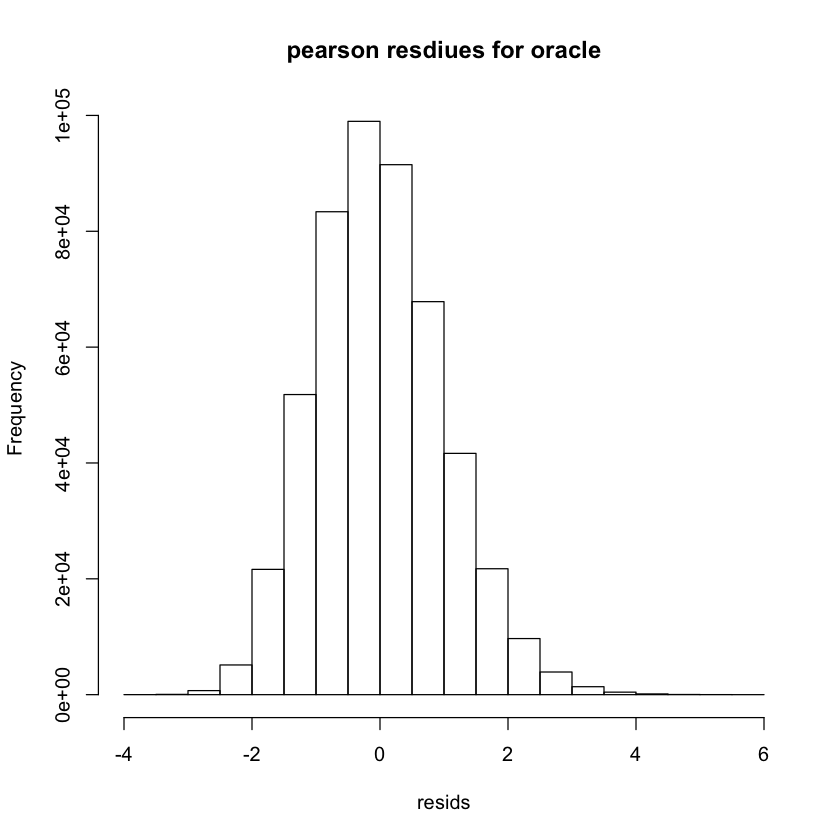

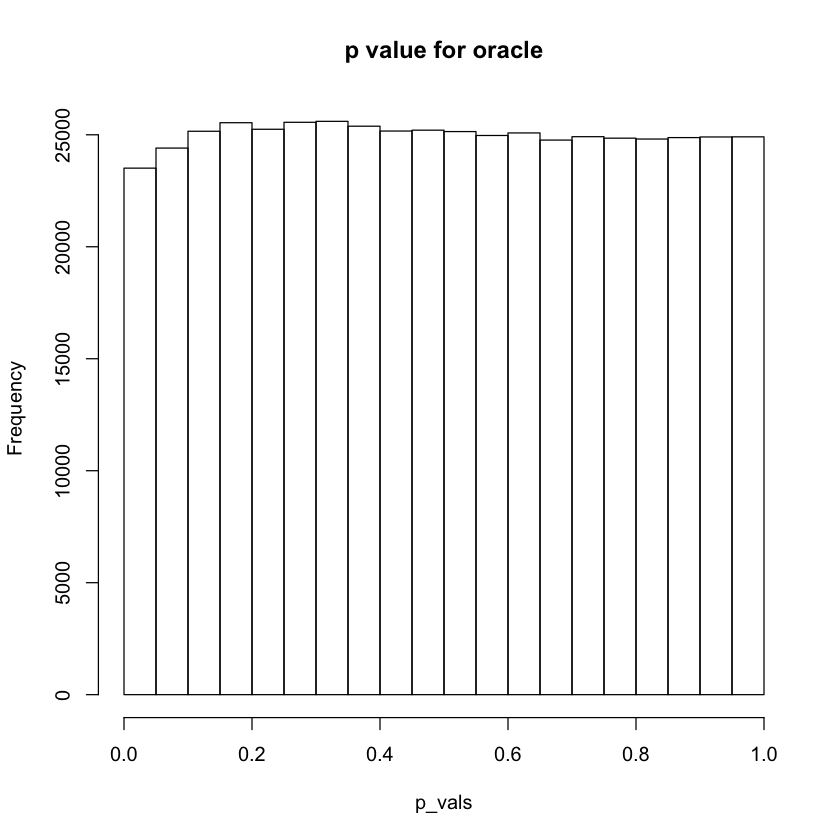

In [3]:
source("../code/data_generation.R")
n = 500
p = 1000
k = 5
out = topic_poisson_generator(n,p,k)
X = out$X
Lam = (out$A %*% out$W)
resids = compute_resid(X, Lam)
hist(resids, breaks = 20, main = "pearson resdiues for oracle")
p_vals = compute_pval(resids)
hist(p_vals, breaks = 20, main = "p value for oracle")

## compute p value using Poisson distribution

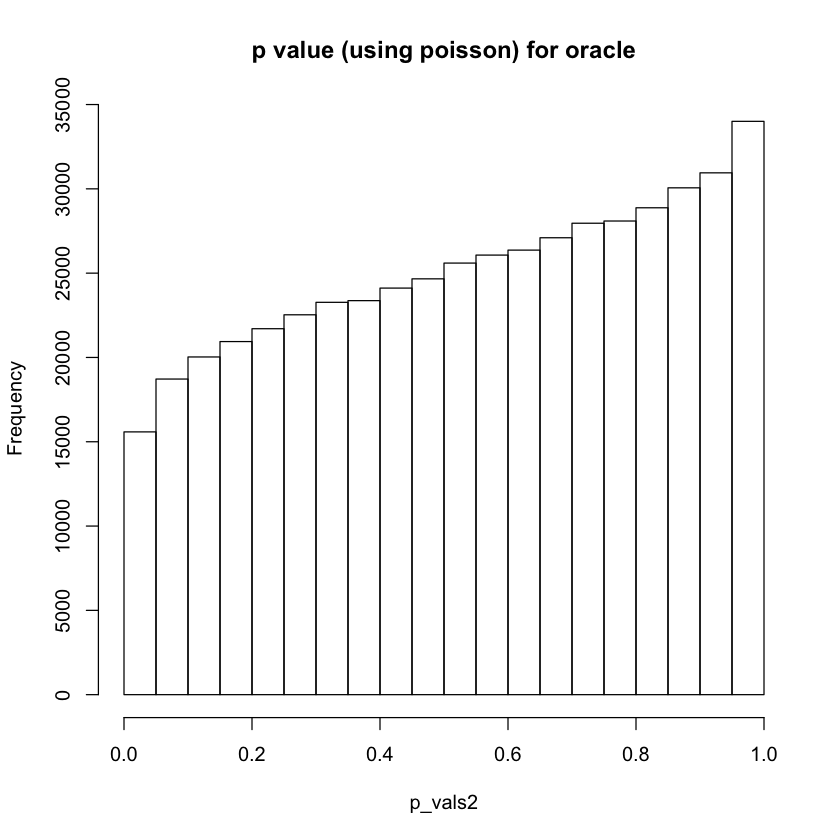

In [13]:
p_vals2 = compute_pval_pois(X,Lam)
hist(p_vals2, breaks = 20, main = "p value (using poisson) for oracle")

# compute p-value for betanmf with different K

Warning message in system.time(out <- .Call("NNLM_nnmf", A, as.integer(k), init.mask$Wi, :
“Target tolerance not reached. Try a larger max.iter.”

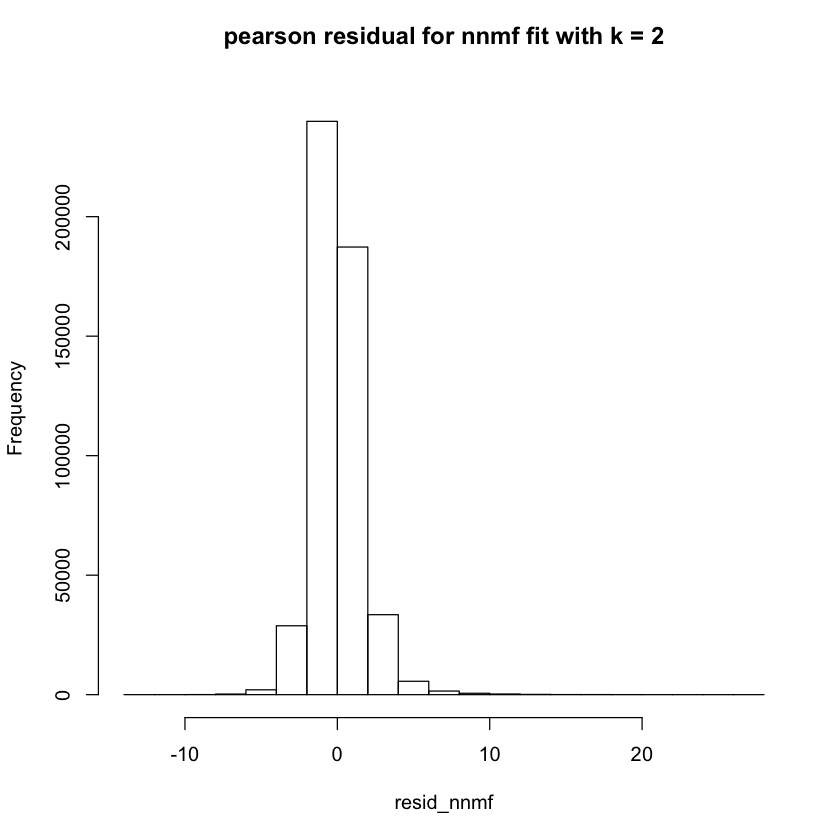

Warning message in system.time(out <- .Call("NNLM_nnmf", A, as.integer(k), init.mask$Wi, :
“Target tolerance not reached. Try a larger max.iter.”

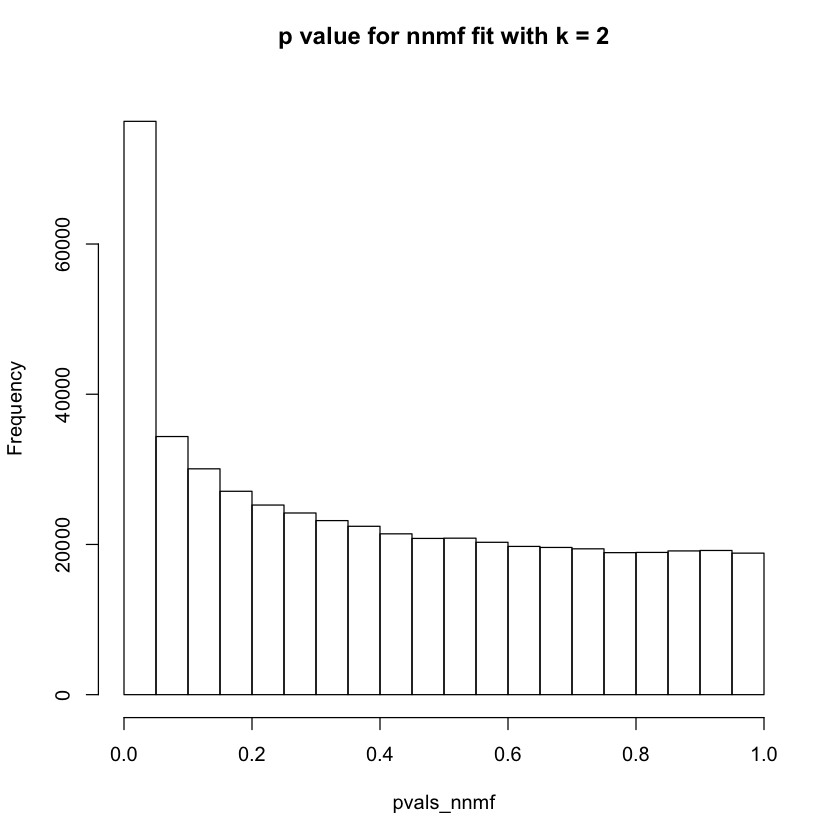

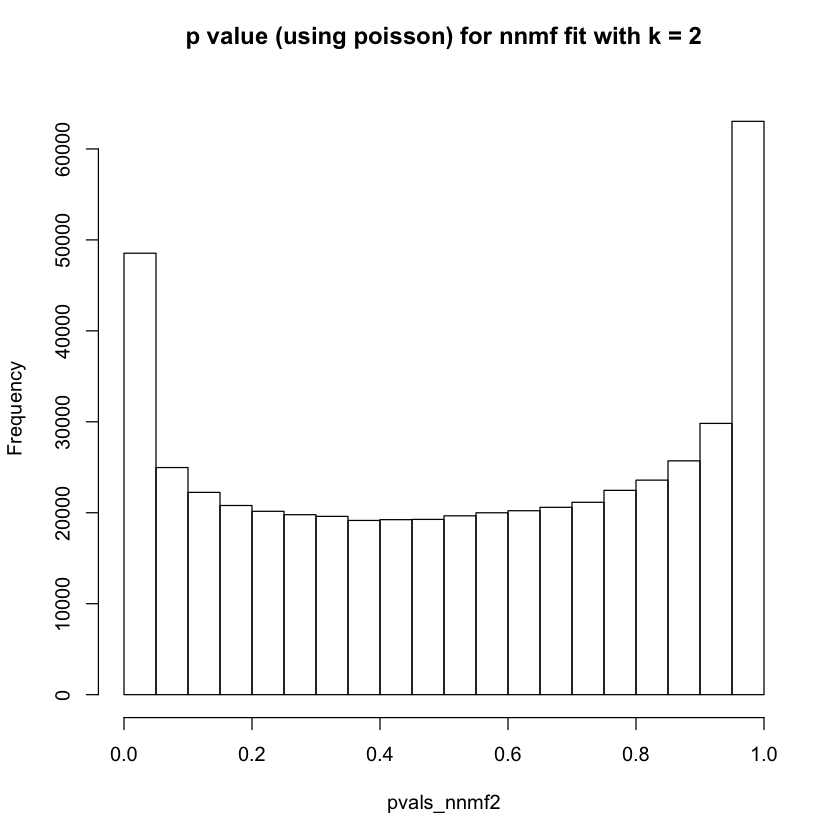

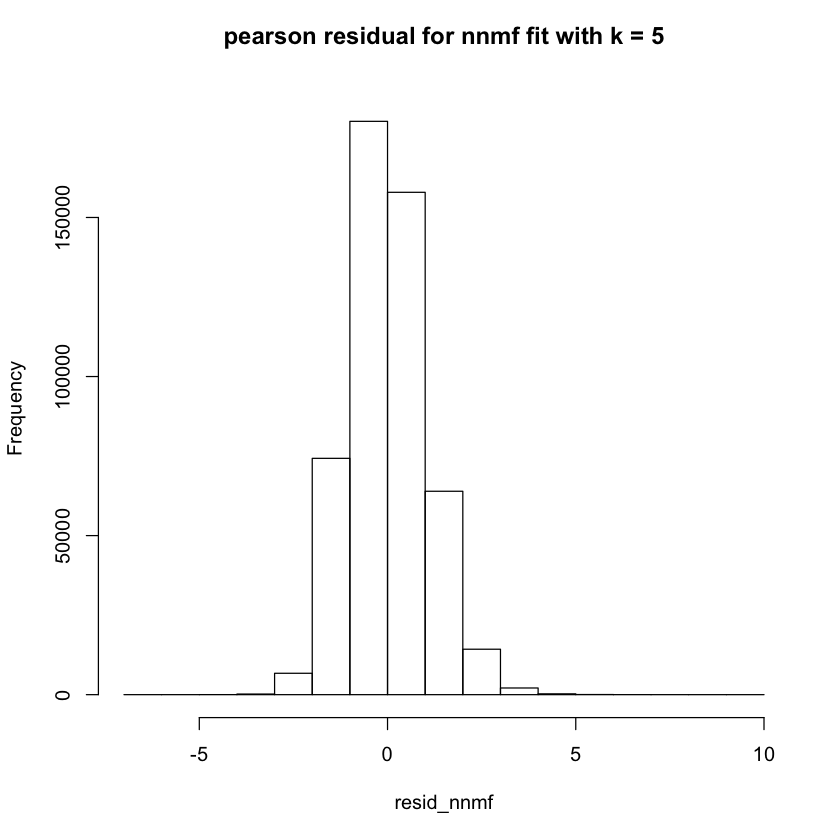

Warning message in system.time(out <- .Call("NNLM_nnmf", A, as.integer(k), init.mask$Wi, :
“Target tolerance not reached. Try a larger max.iter.”

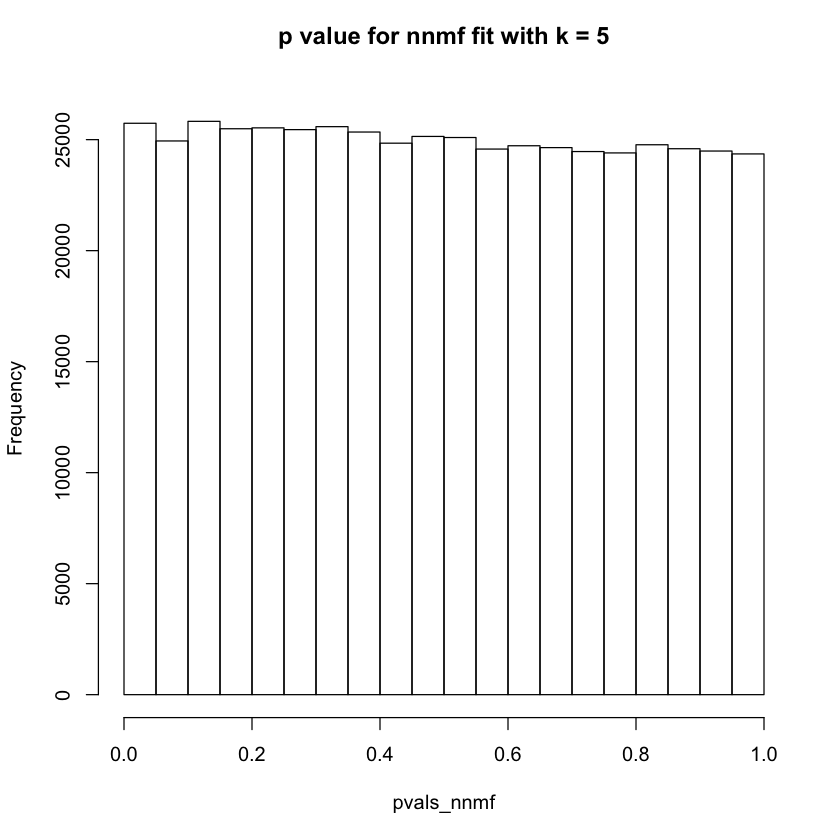

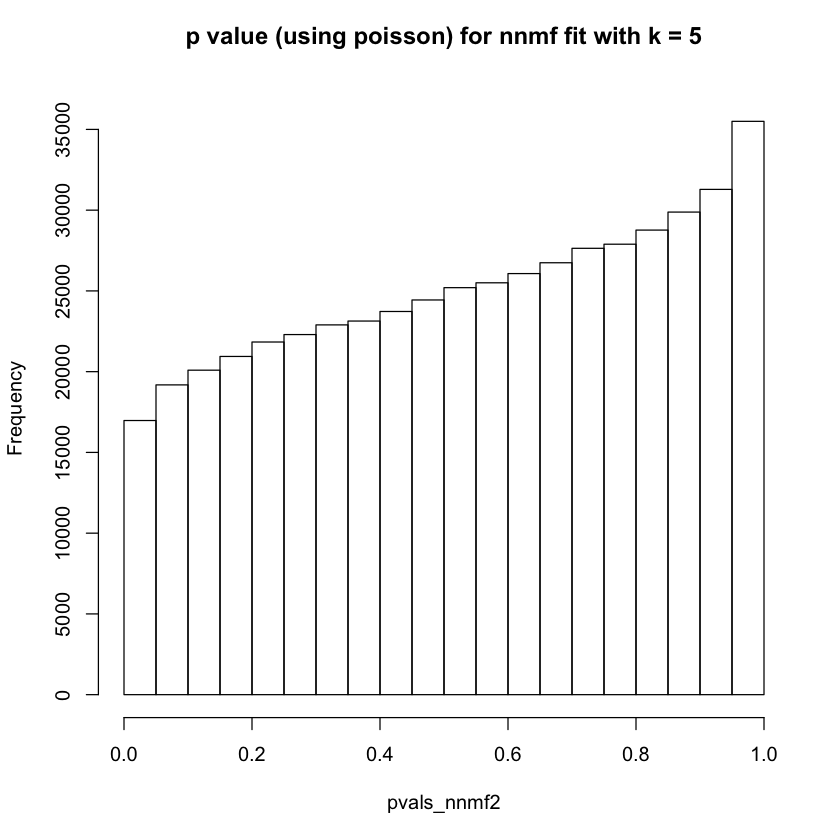

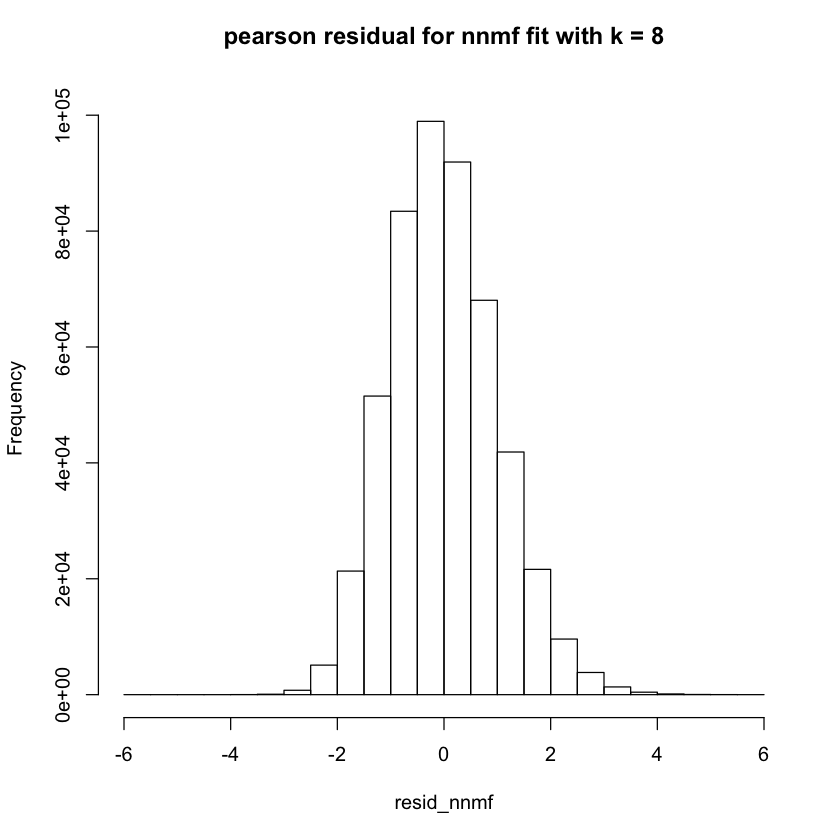

Warning message in system.time(out <- .Call("NNLM_nnmf", A, as.integer(k), init.mask$Wi, :
“Target tolerance not reached. Try a larger max.iter.”

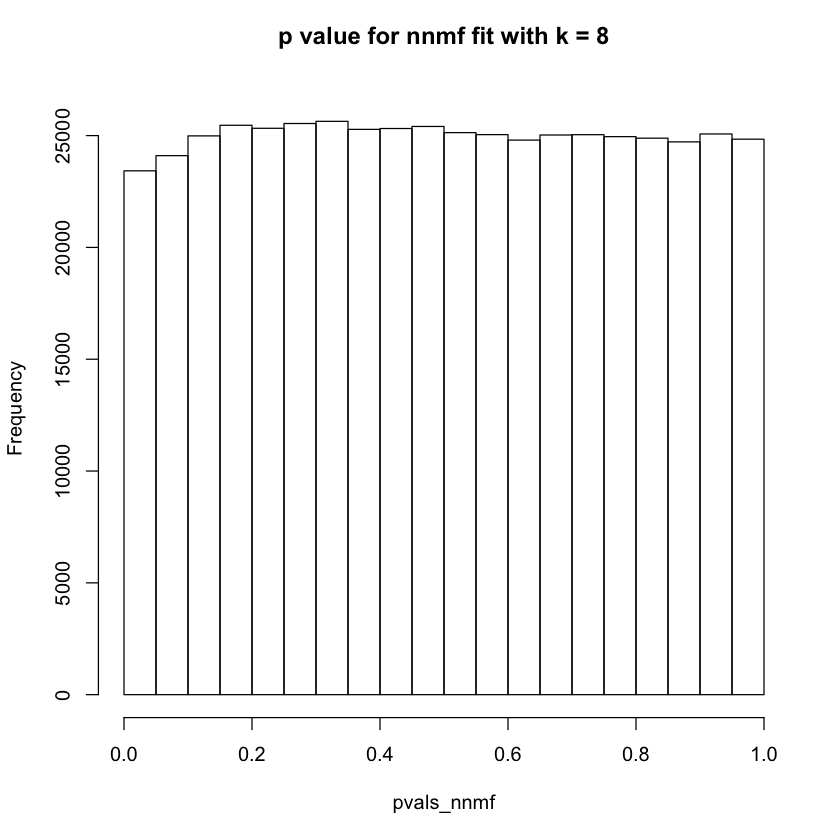

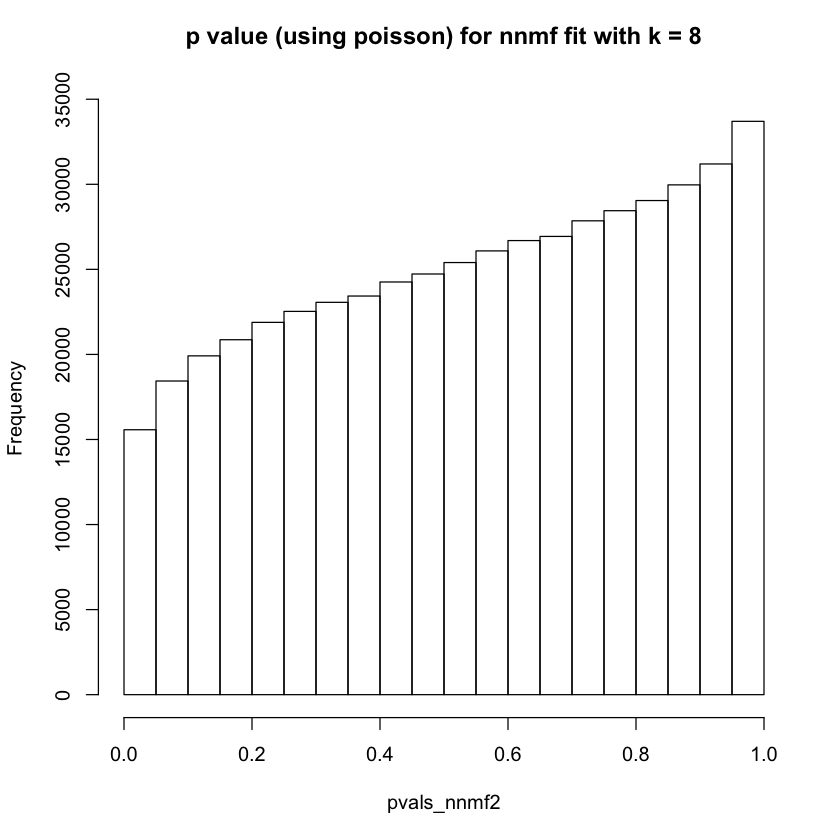

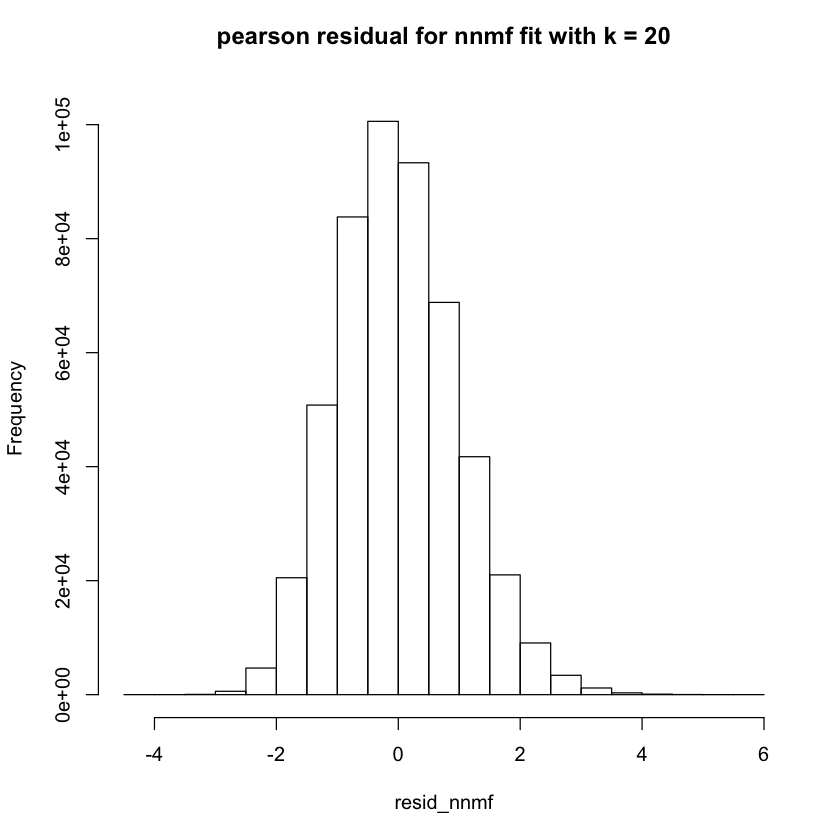

Warning message in system.time(out <- .Call("NNLM_nnmf", A, as.integer(k), init.mask$Wi, :
“Target tolerance not reached. Try a larger max.iter.”

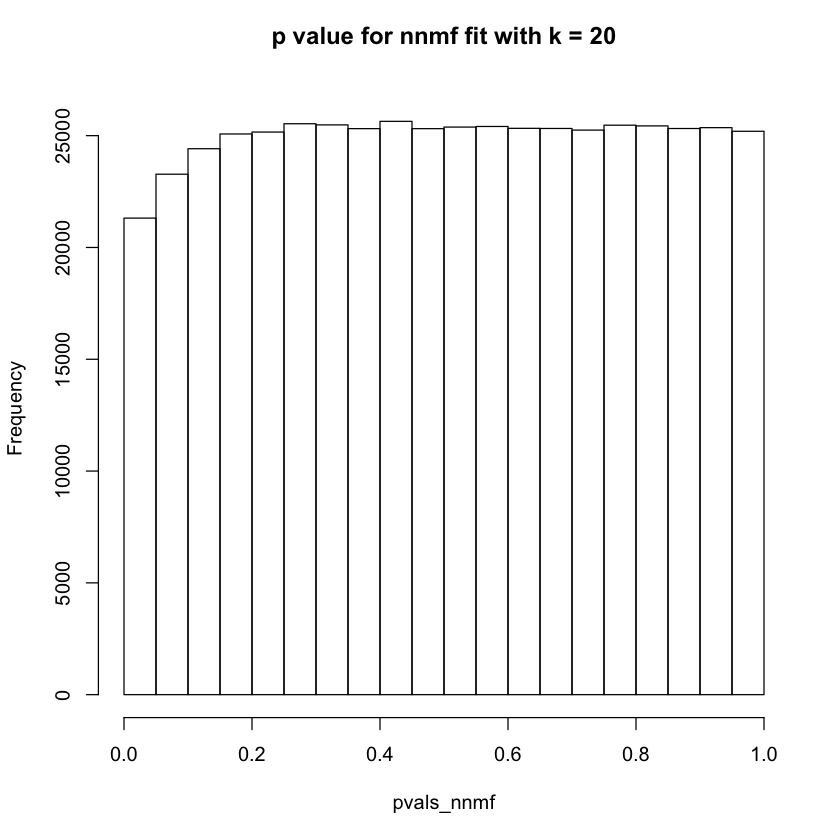

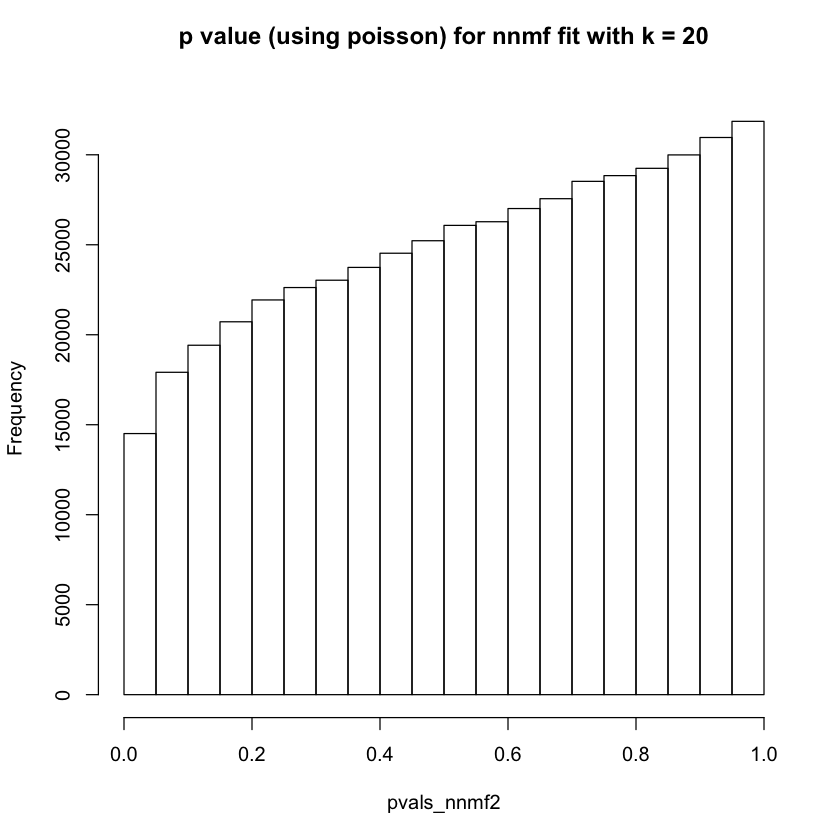

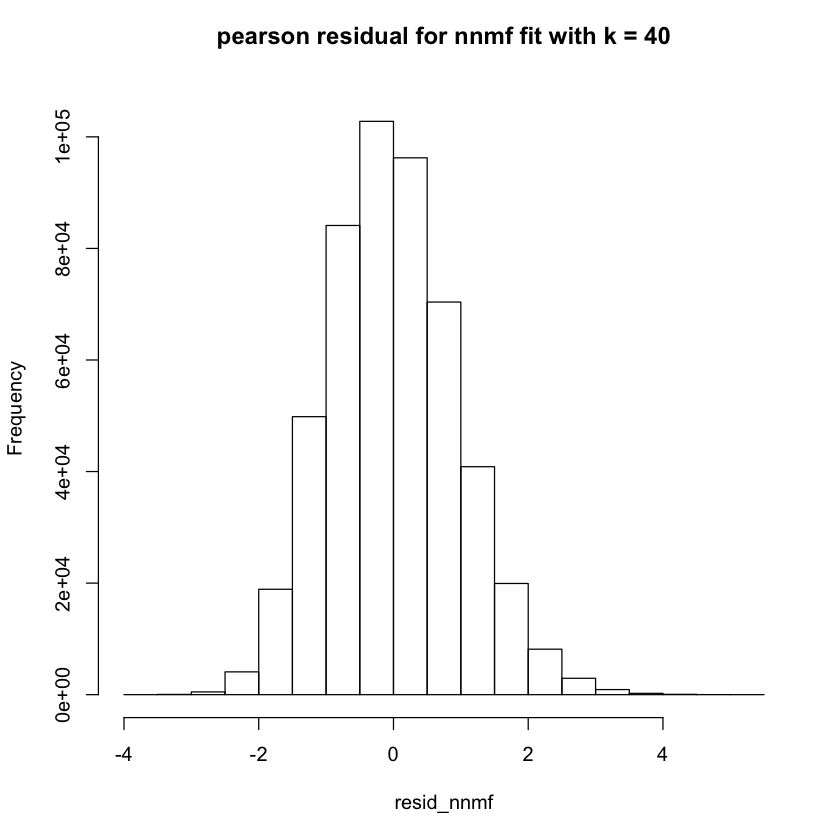

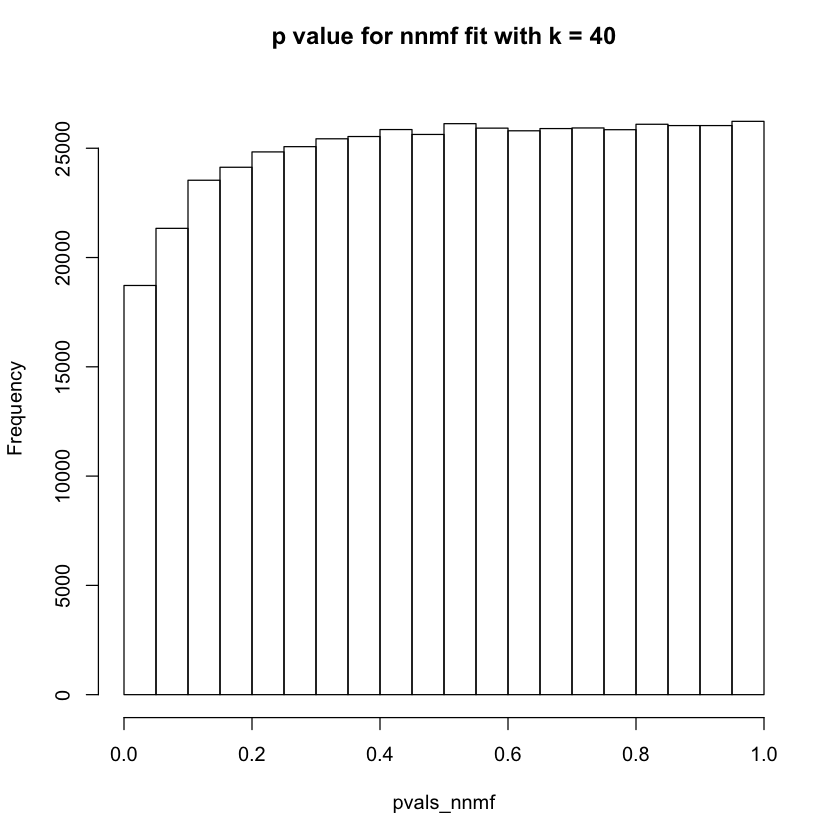

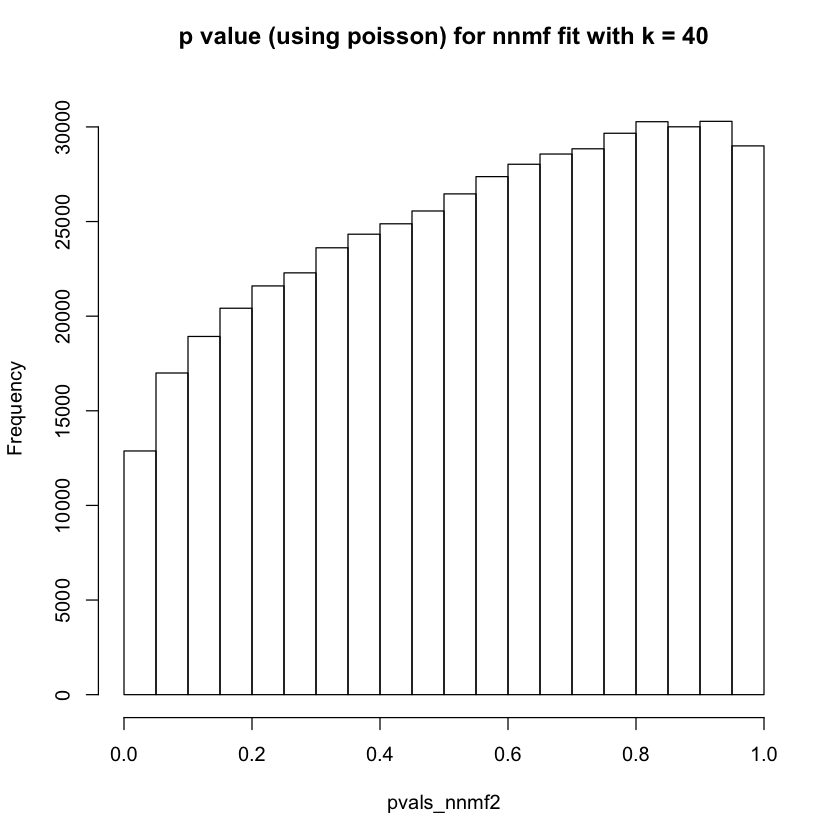

In [14]:
library(NNLM)
ks = c(2,5,8,20,40)
for(k in ks){
    out_nnmf = nnmf(X, k,loss = "mkl",method = "lee",max.iter = 200, rel.tol = 1e-20)
    Lam_nnmf = out_nnmf$W %*% out_nnmf$H
    resid_nnmf = compute_resid(X, Lam_nnmf)
    hist(resid_nnmf, breaks = 20, main = sprintf("pearson residual for nnmf fit with k = %d\n", k))
    pvals_nnmf = compute_pval(resid_nnmf)
    hist(pvals_nnmf, breaks = 20, main = sprintf("p value for nnmf fit with k = %d\n", k))
    pvals_nnmf2 = compute_pval_pois(X, Lam_nnmf)
    hist(pvals_nnmf2, breaks = 20, main = sprintf("p value (using poisson) for nnmf fit with k = %d\n", k))
}